In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
%matplotlib inline
# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

from subprocess import check_output
print(check_output(["ls", "../input"]).decode("utf8"))

#from sklearn.preprocessing import StandardScalar

# Any results you write to the current directory are saved as output.

Images.7z
data.csv



In [2]:
data = pd.read_csv('../input/data.csv')

In [3]:
data.head()

,pixel_0000,pixel_0001,pixel_0002,pixel_0003,pixel_0004,pixel_0005,pixel_0006,pixel_0007,pixel_0008,pixel_0009,...,pixel_1015,pixel_1016,pixel_1017,pixel_1018,pixel_1019,pixel_1020,pixel_1021,pixel_1022,pixel_1023,character
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,character_01_ka
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,character_01_ka
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,character_01_ka
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,character_01_ka
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,character_01_ka


In [4]:
#Sampling the Data for training and Testing the model
# each symbol has 2000  images and thus getting 1600 images for traing data and 400 images for test data for each symbol

X_train = data[data['character'] == data['character'].unique()[0]].iloc[0:int(len(data[data['character'] == data['character'].unique()[0]])*0.8),:]
X_test  = data[data['character'] == data['character'].unique()[0]].iloc[int(len(data[data['character'] == data['character'].unique()[0]])*0.8): ,:]

for char in [word for word in data['character'].unique()[1:,]]:
    X_train = pd.concat([X_train,data[data['character'] == char].iloc[0:int(len(data[data['character'] == char])*0.8),:]])
    X_test= pd.concat([X_test,data[data['character'] == char].iloc[int(len(data[data['character'] == char])*0.8): ,:]])
     

In [5]:
#importing Shuffle from  Sklearn to shuffle the edata
from sklearn.utils import shuffle
X_train = shuffle(X_train)

In [6]:
#filtering label from training data and test data
y_train = X_train['character']
X_train = X_train.drop('character',axis=1)

y_test = X_test['character']
X_test = X_test.drop('character',axis=1)

In [7]:
(len(X_train)==len(y_train) ) and (len(X_test)==len(y_test))

True

 > ***Ploting the Characters***

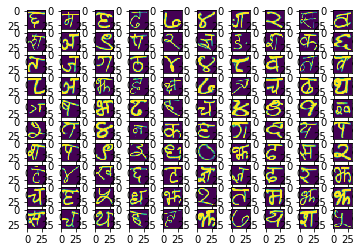

In [8]:
import math
plt.figure(figsize=(10,6))
fig,ax = plt.subplots(10,10)
for i in range(0,100):
    img = X_train.iloc[i,0:].values.reshape(32,32)
    n = math.floor(i/10)
    m = [0,1,2,3,4,5,6,7,8,9]*100
    ax[n,m[i]].imshow(img)

**    ****Training the model using MLPClassifier (neural Network)******


In [ ]:
from sklearn.neural_network import MLPClassifier

In [ ]:
#intiating the classifier and fitting the Training Data
nn = MLPClassifier(hidden_layer_sizes=(1000,500,800,1000),verbose=2,learning_rate='adaptive', random_state=2,alpha=5e-5,batch_size=200, solver='adam')
nn.fit(X_train,y_train)

In [ ]:
#predticing the model on test data
pred = nn.predict(X_test)

In [ ]:
#Evaluating the model
from sklearn.metrics import classification_report,confusion_matrix

In [ ]:
print('Classification report :', classification_report(pred,y_test))

In [ ]:
print('Confusion matrix :', confusion_matrix(pred,y_test))